# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Deploy LLM App with Ollama and Langchain in Production**](https://www.udemy.com/course/ollama-and-langchain/?referralCode=7F4C0C7B8CF223BA9327) | Master Langchain v0.3, Private Chatbot, Deploy LLM App.  Ollama, LLAMA, LLAMA 3.2, FAISS, RAG, Deploy RAG, Gen AI, LLM|
| [**Fine Tuning LLM with HuggingFace Transformers for NLP**](https://www.udemy.com/course/fine-tuning-llm-with-hugging-face-transformers/?referralCode=6DEB3BE17C2644422D8E) | Learn how to fine tune LLM with custom dataset. You will learn basics of transformers then fine tune LLM|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


## Tool Calling or Function Calling
- LLM Automatically calls the function based on the query
- Function parameters are automatically passed to the function
- It is one of the essential requirements of the Agent
- Not all LLM supports tool calling.

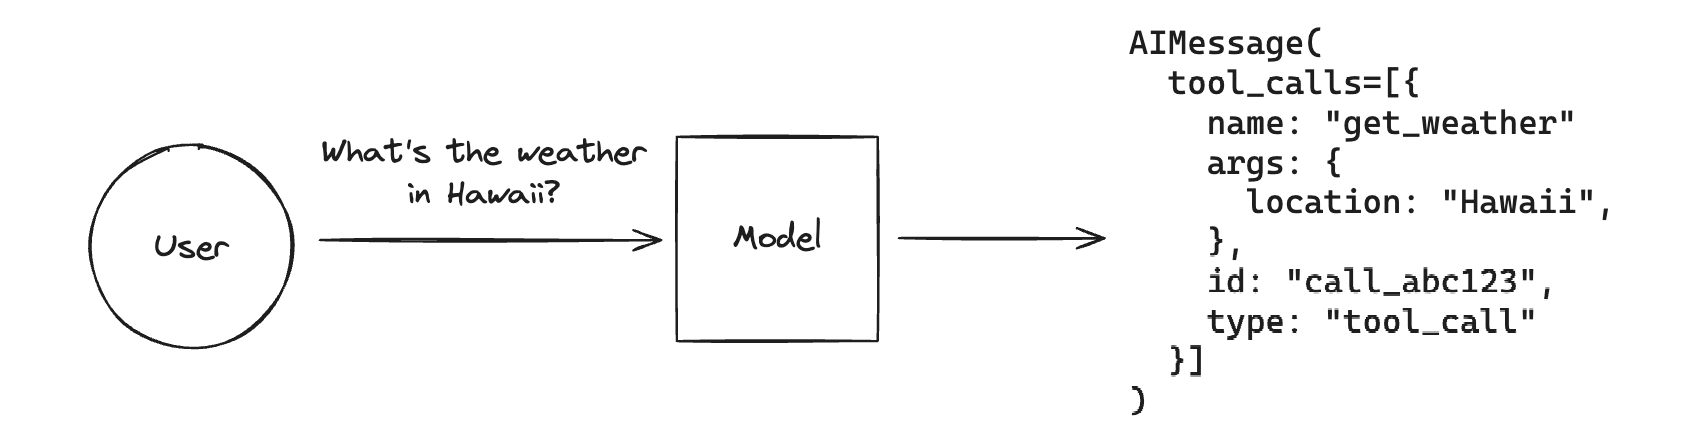

- Chat models that support tool calling features implement a .bind_tools() method for passing tool schemas to the model.

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_ollama import ChatOllama 
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough 
from langchain_core.prompts import ChatPromptTemplate

llm = ChatOllama(model='llama3.2:3b', base_url='http://localhost:11434')
llm.invoke('hi')

AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-10-31T20:19:46.103983Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 1021489600, 'load_duration': 19919700, 'prompt_eval_count': 26, 'prompt_eval_duration': 233162000, 'eval_count': 8, 'eval_duration': 766465000}, id='run-581d1482-9179-41c8-a6a2-bb5cacc595e5-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})

### Custom Tools

In [3]:
### Tool Creation

from langchain_core.tools import tool

@tool
def add(a, b):
    """
    Add two integer numbers together
    
    Args:
    a: First Integer
    b: Second Integer
    """
    return a + b

@tool
def multiply(a, b):
    """
    Multiply two integer numbers together
    
    Args:
    a: First Integer
    b: Second Integer
    """
    return a * b




In [4]:
add.name, add.description, add.args, add.args_schema.schema()

('add',
 'Add two integer numbers together\n\nArgs:\na: First Integer\nb: Second Integer',
 {'a': {'title': 'A'}, 'b': {'title': 'B'}},
 {'description': 'Add two integer numbers together\n\nArgs:\na: First Integer\nb: Second Integer',
  'properties': {'a': {'title': 'A'}, 'b': {'title': 'B'}},
  'required': ['a', 'b'],
  'title': 'add',
  'type': 'object'})

In [5]:
add.invoke({'a': 1, 'b': 2})

3

In [6]:
multiply.invoke({'a': 67, 'b': 2})

134

In [7]:
tools = [add, multiply]

llm_with_tools = llm.bind_tools(tools)

In [8]:
question  = "what is 1 plus 2?"
llm_with_tools.invoke(question).tool_calls

[{'name': 'add',
  'args': {'a': '1', 'b': '2'},
  'id': 'e5e9e71d-ce95-4966-82a7-00be81befa10',
  'type': 'tool_call'}]

In [9]:
question  = "what is 1 multiplied by 2?"
llm_with_tools.invoke(question).tool_calls

[{'name': 'multiply',
  'args': {'a': '1', 'b': '2'},
  'id': 'b82a4145-1911-4695-b3f6-df0775eaa4b3',
  'type': 'tool_call'}]

In [10]:
question  = "what is 1 multiplied by 2, also what is 11 plus 22?"
llm_with_tools.invoke(question).tool_calls

[{'name': 'multiply',
  'args': {'a': '1', 'b': '2'},
  'id': '4f196d51-9863-401c-af88-f29428e2cf08',
  'type': 'tool_call'},
 {'name': 'add',
  'args': {'a': '11', 'b': '22'},
  'id': 'f84be3d4-90fc-421b-bc7e-8f26a152cffa',
  'type': 'tool_call'}]

## Calling In-Built Tool 
### DuckDuckGo Search
- There are so many other paid options are also available like Tavily, Google, Bing, etc.

In [11]:
# https://python.langchain.com/docs/integrations/tools/

# !pip install -qU duckduckgo-search wikipedia xmltodict tavily-python

In [12]:
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

search.invoke("What is today's stock market news?")

"The Nasdaq Composite (^IXIC) rose 0.6%. The S&P 500 (^GSPC) popped about about 0.7%, and the Dow Jones Industrial Average (^DJI) added more than 1%, or nearly 450 points. Both the Dow and S&P 500 ... Stock market today: Dow tumbles 400 points, tech leads Nasdaq, S&P 500 lower as 10-year yield tops 4% Karen Friar · Editor Mon, Oct 7, 2024, 4:01 PM 1 min read ES=F. US stocks rose on Monday with two major indexes clinching record closes as Nvidia (NVDA) led a risk-on rally in the market that permeated through most sectors and even into cryptocurrencies ... Find the latest stock market news from every corner of the globe at Reuters.com, your online source for breaking international market and finance news The analysis you'll find in the Stock Market Today is based on over 130 years of market history and a detailed study of every top-performing stock since the 1880s. By tracking the market in terms ..."

### Tavily Search

In [13]:
from langchain_community.tools import TavilySearchResults

search = TavilySearchResults(
    max_results=5,
    search_depth="advanced",
    include_answer=True,
    include_raw_content=True,
)

In [14]:
question = "what is today's stock market news?"
search.invoke(question)

[{'url': 'https://www.investors.com/news/stock-market-today-stock-market-news/',
  'content': "Today: Stock Market News And Analysis\nLATEST MARKET UPDATES\nCurrent Recommended Market Exposure Level\nSTOCK MARKET TODAY\nWith regular updates throughout each trading session, the Stock Market Today column highlights the latest stock market news and alerts you to any changes in market trend. By tracking the market in terms of three stages\xa0—\xa0market in uptrend, uptrend under pressure and market correction — the Stock Market Today helps you stay on top of the latest stock market news while keeping any latest fluctuations in perspective to help you decide what action, if any, to take.\n Start With This 3-Step Routine\nSee Which Stocks Were Just Added To – And Removed From – IBD Stock Lists\nHow To Buy Stocks\xa0|\xa0Buying Checklist\nWhen To Sell Stocks\xa0|\xa0Selling Checklist\nIBD Newsletters\nIBD Newsletters\nGet these newsletters delivered to your inbox & more info about our product

### Wikipedia Search

In [15]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper


wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())


question = "what is the capital of France?"
question = "What is LLM?"

print(wikipedia.invoke(question))

Page: Large language model
Summary: A large language model (LLM) is a type of computational model designed for natural language processing tasks such as language generation. As language models, LLMs acquire these abilities by learning statistical relationships from vast amounts of text during a self-supervised and semi-supervised training process.
The largest and most capable LLMs are artificial neural networks built with a decoder-only transformer-based architecture, enabling efficient processing and generation of large-scale text data. Modern models can be fine-tuned for specific tasks, or be guided by prompt engineering. These models acquire predictive power regarding syntax, semantics, and ontologies inherent in human language corpora, but they also inherit inaccuracies and biases present in the data on which they are trained.

Page: Prompt engineering
Summary: Prompt engineering is the process of structuring an instruction that can be interpreted and understood by a generative art

### PubMed

- PubMed® comprises more than 35 million citations for biomedical literature from MEDLINE, life science journals, and online books. Citations may include links to full text content from PubMed Central and publisher web sites.



In [16]:
from langchain_community.tools.pubmed.tool import PubmedQueryRun

search = PubmedQueryRun()

print(search.invoke("What is the latest research on COVID-19?"))

Published: 2024-10-30
Title: Are Repeat-Dose Toxicity Studies Informative for Safety Assessment of Vaccine Candidates? A Survey of Vaccine Developers.
Copyright Information: 
Summary::
A BioSafe-sponsored survey investigated how vaccine companies (n = 12) perceive the value of the repeat-dose toxicity studies for safety assessment of vaccine candidates. As all major vaccine developers were part of the survey, it was considered representative for the industry practices up to 2022. Vaccine developers indicated that they see scientific value in performing repeat-dose toxicity studies with vaccines, especially when novel components (e.g., adjuvant) or technology is being used. However, a few (3/12) also indicated that repeat-dose toxicity studies could be replaced by a pharmacology study with additional toxicity parameters. For the majority of companies (9/12), findings from the repeat-dose toxicity studies never prevented or postponed a first-in-human (FIH) trial. In the remaining 3 compa

### Tool Calling with LLM

In [33]:
@tool
def wikipedia_search(query):
    """
    Search wikipedia for general information.
    
    Args:
    query: The search query
    """
    
    wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())
    response = wikipedia.invoke(query)
    return response

@tool
def pubmed_search(query):
    """
    Search pubmed for medical and life sciences queries.
    
    Args:
    query: The search query
    """
    
    search = PubmedQueryRun()
    response = search.invoke(query)
    return response

@tool
def tavily_search(query):
    """
    Search the web for realtime and latest information.
    for examples, news, stock market, weather updates etc.
    
    Args:
    query: The search query
    """
    
    search = TavilySearchResults(
        max_results=5,
        search_depth="advanced",
        include_answer=True,
        include_raw_content=True,
    )
    response = search.invoke(query)
    return response


@tool
def multiply(a:int, b:int)->int:
    """
    Multiply two integer numbers together
    
    Args:
    a: First Integer
    b: Second Integer
    """
    return int(a) * int(b)


In [34]:
tools = [wikipedia_search, pubmed_search, tavily_search, multiply]

list_of_tools = { tool.name: tool for tool in tools }

In [35]:
list_of_tools

{'wikipedia_search': StructuredTool(name='wikipedia_search', description='Search wikipedia for general information.\n\nArgs:\nquery: The search query', args_schema=<class 'langchain_core.utils.pydantic.wikipedia_search'>, func=<function wikipedia_search at 0x00000237373C9080>),
 'pubmed_search': StructuredTool(name='pubmed_search', description='Search pubmed for medical and life sciences queries.\n\nArgs:\nquery: The search query', args_schema=<class 'langchain_core.utils.pydantic.pubmed_search'>, func=<function pubmed_search at 0x00000237373C8B80>),
 'tavily_search': StructuredTool(name='tavily_search', description='Search the web for realtime and latest information.\nfor examples, news, stock market, weather updates etc.\n\nArgs:\nquery: The search query', args_schema=<class 'langchain_core.utils.pydantic.tavily_search'>, func=<function tavily_search at 0x00000237373C9C60>),
 'multiply': StructuredTool(name='multiply', description='Multiply two integer numbers together\n\nArgs:\na: F

In [36]:
llm_with_tools = llm.bind_tools(tools)

In [37]:
# query = "What is the latest news"
# query = "What is today's stock market news?"
# query = "What is LLM?"
# query = "How to treat lung cancer?"
query  = "what is 2 * 3?"
response = llm_with_tools.invoke(query)
print(response.tool_calls)

[{'name': 'multiply', 'args': {'a': '2', 'b': '3'}, 'id': '13b56069-3b00-4de6-88c6-13b6fdffb89a', 'type': 'tool_call'}]


### Generate Final Result with Tool Calling

In [38]:
from langchain_core.messages import HumanMessage, AIMessage

In [39]:
# query = "What is the latest news"
# query = "What is today's stock market news?"
# query = "What is LLM?"
query = "How to treat lung cancer?"
# query  = "what is 2 * 3?"

messages = [HumanMessage(query)]

tool_calls = llm_with_tools.invoke(messages)

messages.append(tool_calls)

tool_calls = tool_calls.tool_calls


In [44]:
from langchain_core.messages import HumanMessage

# query = "What is the latest news"
# query = "What is today's stock market news?"
# query = "What is LLM?"
query = "What is medicine for lung cancer?"
# query  = "what is 2 * 3?"

messages = [HumanMessage(query)]

ai_msg = llm_with_tools.invoke(messages)

messages.append(ai_msg)

In [45]:
for tool_call in ai_msg.tool_calls:
    print(tool_call)

    name = tool_call['name'].lower()

    selected_tool = list_of_tools[name]

    tool_msg = selected_tool.invoke(tool_call)

    messages.append(tool_msg)

{'name': 'pubmed_search', 'args': {'query': 'medicine for lung cancer'}, 'id': '47c1b566-d938-4336-8a7b-963e7817228e', 'type': 'tool_call'}


In [46]:
messages

[HumanMessage(content='What is medicine for lung cancer?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-10-31T20:29:52.2409179Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'pubmed_search', 'arguments': {'query': 'medicine for lung cancer'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 702882700, 'load_duration': 20843800, 'prompt_eval_count': 361, 'prompt_eval_duration': 361520000, 'eval_count': 21, 'eval_duration': 318185000}, id='run-d5167358-84b0-4f5d-becc-0137f5d37cde-0', tool_calls=[{'name': 'pubmed_search', 'args': {'query': 'medicine for lung cancer'}, 'id': '47c1b566-d938-4336-8a7b-963e7817228e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 361, 'output_tokens': 21, 'total_tokens': 382}),
 ToolMessage(content='Published: 2024-10-01\nTitle: Lung Cancer Screening at US Hospitals for People Lacking Primary Ca

In [47]:
response = llm_with_tools.invoke(messages)
print(response.content)

Based on the search results, here are some common medicines used to treat lung cancer:

1. Chemotherapy: This is a type of treatment that uses medications to kill cancer cells. Common chemotherapy medications for lung cancer include:
	* Carboplatin (Paraplatin)
	* Docetaxel (Taxotere)
	* Etoposide (Vepesid)
	* Paclitaxel (Taxol)
2. Targeted therapy: This type of treatment uses medications that specifically target and kill cancer cells. Common targeted therapies for lung cancer include:
	* Crizotinib (Xalkori) for non-small cell lung cancer (NSCLC)
	* Afilutopumab (TAFINlar) for NSCLC
	* Nivolumab (Opdivo) and pembrolizumab (Keytruda) for NSCLC and small cell lung cancer (SCLC)
3. Immunotherapy: This type of treatment uses medications that help the body's immune system recognize and attack cancer cells. Common immunotherapies for lung cancer include:
	* Nivolumab (Opdivo) and pembrolizumab (Keytruda) for NSCLC and SCLC
4. Radiation therapy: This type of treatment uses high-energy rays t